MNS 1
===
Dominik Krzemiński

#### 1. McCulloch-Pitts neuron

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def mcp_neuron(weights, x):
    if len(x)<3:
        x = np.concatenate(([1],x))
    return np.sign(np.dot(weights,x))

In [30]:
xs = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
w = np.array([-3, 2, 2])
y = np.zeros(xs.shape[0])
for e,xr in enumerate(xs):
    y[e] = mcp_neuron(w,xr)
    print "Inputs: {}, {} Output: {}".format(xr[0],xr[1], y[e])

Inputs: -1, -1 Output: -1.0
Inputs: -1, 1 Output: -1.0
Inputs: 1, -1 Output: -1.0
Inputs: 1, 1 Output: 1.0


We receive positive response only for input 1 and 1 so that particular perceptron implement AND function.

#### 2. Activation functions

In [31]:
def sigmoid(x, a=1):
    return (1+np.exp(-a*x))**(-1)

def hyptan(x):
    return np.tanh(x)

def step(x):
    return np.array([1 if i >= 0 else 0 for i in x])

def piecewise(x):
    xn = np.copy(x)
    xn[xn<=-0.5] = -0.5
    xn[xn>=0.5]  = 0.5
    return xn

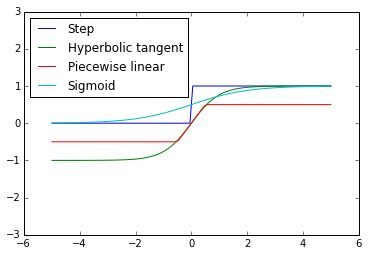

In [32]:
functions = {"Sigmoid":sigmoid, "Hyperbolic tangent": hyptan, "Step": step, "Piecewise linear": piecewise}
xax = np.linspace(-5,5,100)
for name, fun in functions.iteritems():
    plt.plot(xax,fun(xax), label=name)
plt.legend(loc=2)
plt.ylim(-3,3)
plt.show()

#### 3. Rosenblatt’s perceptron


In [33]:
# training data
n = 1000
x = np.hstack((np.ones((n,1)),np.random.randn(n,2)))
dx = np.ones((n,1))
dx[x[:,2]<0.5-x[:,1]] = -1

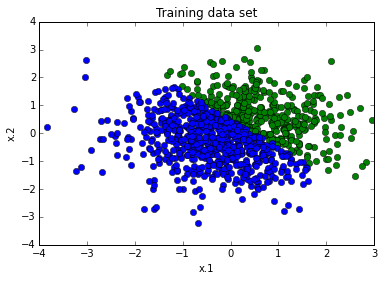

In [34]:
plt.plot(x[:,1][(dx==1).T[0]],x[:,2][(dx==1).T[0]], 'go')
plt.plot(x[:,1][(dx==-1).T[0]],x[:,2][(dx==-1).T[0]], 'bo')
plt.title("Training data set")
plt.xlabel("x.1")
plt.ylabel("x.2")
plt.show()

In [35]:
# learning
w = np.random.randn(3)
out = np.zeros(n)
eta = 0.1#learning rate
for i in range(n):
    out[i] = mcp_neuron(w, x[i])
    w += eta*(dx[i]-out[i])*x[i]

In [36]:
def predict(weights, x):
    if len(x)<3:
        x = np.concatenate(([1],x))
    return np.sign(np.dot(weights,x))

In [37]:
# test data
ntst = 100
x_tst = np.hstack((np.ones((ntst,1)),np.random.randn(ntst,2)))
dx_tst = np.ones((ntst,1))
dx_tst[x_tst[:,2]<0.5-x_tst[:,1]] = -1

In [38]:
correct = 0
for i in range(ntst):
    out_tst = predict(w, x_tst[i])
    if out_tst==dx_tst[i]:
        correct +=1
print 'Efficiency on test set: {} %'.format(correct*100./ntst)

Efficiency on test set: 98.0 %


In [39]:
wn = w[1:]*1./np.sum(w[1:]**2)
ang = np.arctan(w[2]*1./w[1])
b1 = np.abs(w[0])*np.cos(ang)
b2 = np.abs(w[0])*np.sin(ang)

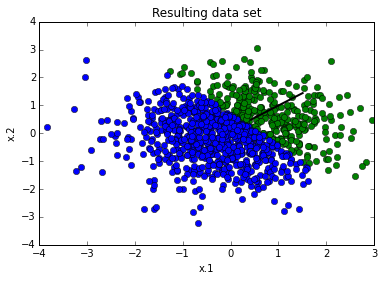

In [40]:
predicted = np.array([predict(w, k) for k in x])
plt.plot(x[:,1][predicted==1], x[:,2][predicted==1], 'go')
plt.plot(x[:,1][predicted==-1], x[:,2][predicted==-1], 'bo')
plt.plot([b2, b2+w[1]], [b1, b1+w[2]], 'k',lw=2)
plt.title("Resulting data set")
plt.xlabel("x.1")
plt.ylabel("x.2")
plt.show()

From the picture above we may conclude that our network performs pretty well in that task. Resulted picture is similar to the generated data. We can say that our weight vector is optimal because it is perpendicular to decision line which the best separates the data.

#### 4. Linear separability

In [41]:
# initial weights
wg = np.random.randn(3)
inxor = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
outxor = np.array([-1, 1, 1, -1])

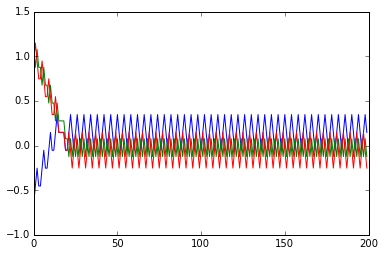

In [42]:
n_steps = 50
coll_w = np.zeros((n_steps*len(outxor),3))
it = 0
for i in range(n_steps):
    for k in xrange(len(outxor)):
        inx = np.concatenate(([1],inxor[k]))
        y = mcp_neuron(w, inx)
        w += eta*(outxor[k]-y)*inx
        coll_w[it] = w
        it += 1

#print coll_w
plt.plot(coll_w)
plt.show()

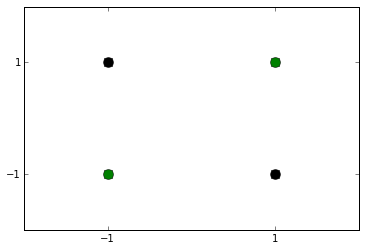

In [43]:
for i in range(4):
    color = 'k' if outxor[i]==1 else 'g'
    plt.plot(inxor[i][0],inxor[i][1], color+'o', lw=4, markersize=10)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xticks([-1,1])
plt.yticks([-1,1])
plt.show()

From the picture above we can se why our perceptron doesn't converge. One can't separate the data using only one line as decision boundary. To solve this problem we should use more complicated network architecture.